In [1]:
# load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:

df=pd.read_csv(r"C:\Users\asus\INeuron\winequalityN.csv")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
pd.Categorical(df['quality'])

[6, 6, 6, 6, 6, ..., 5, 6, 6, 5, 6]
Length: 6497
Categories (7, int64): [3, 4, 5, 6, 7, 8, 9]

In [6]:
df['quality'].dtypes # this is a regression probles

dtype('int64')

In [7]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
pd.Categorical(df['type'])

['white', 'white', 'white', 'white', 'white', ..., 'red', 'red', 'red', 'red', 'red']
Length: 6497
Categories (2, object): ['red', 'white']

In [9]:
df.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

## Missing Values

In [10]:
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [11]:
feature_nan

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'pH',
 'sulphates']

In [12]:
df[feature_nan].isnull().mean()*100

fixed acidity       0.153917
volatile acidity    0.123134
citric acid         0.046175
residual sugar      0.030783
chlorides           0.030783
pH                  0.138525
sulphates           0.061567
dtype: float64

In [13]:
df.shape

(6497, 13)

<AxesSubplot:xlabel='type', ylabel='quality'>

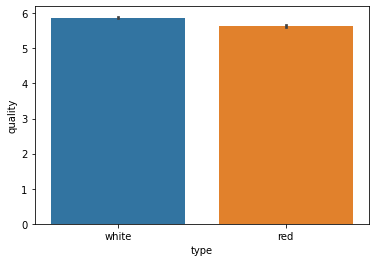

In [14]:
sns.barplot(x="type",y="quality",data=df)

## Numerical features

In [15]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!="O"]

In [16]:
numerical_feature

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [17]:
pd.Categorical(df['fixed acidity'])

[7.0, 6.3, 8.1, 7.2, 7.2, ..., 6.2, 5.9, 6.3, 5.9, 6.0]
Length: 6497
Categories (106, float64): [3.8, 3.9, 4.2, 4.4, ..., 15.0, 15.5, 15.6, 15.9]

In [18]:
dis_feature = [feature for feature in df.columns if len(df[feature].unique())<25]

In [19]:
dis_feature

['type', 'quality']

<AxesSubplot:xlabel='type', ylabel='quality'>

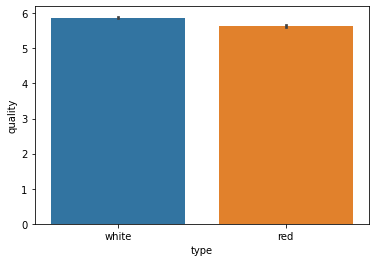

In [20]:
sns.barplot(x="type",y="quality",data=df)

<BarContainer object of 6497 artists>

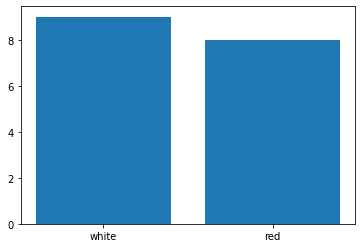

In [21]:
import matplotlib.pyplot as plt

plt.bar(x="type",height="quality",data=df)

## Continuous Variables

In [23]:
continuous_feature=[feature for feature in df.columns if len(df[feature].unique()) > 15]

In [25]:
len(continuous_feature)

11

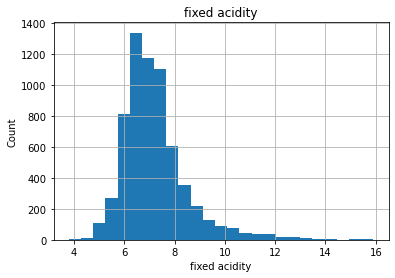

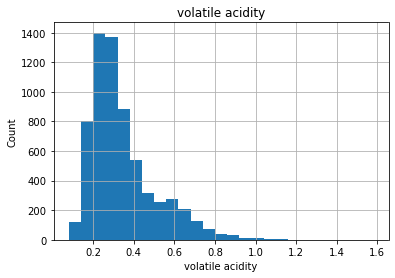

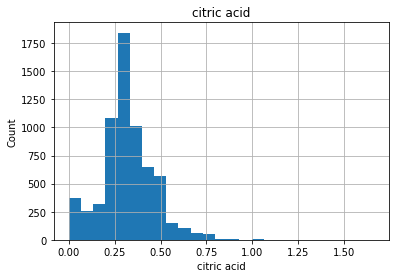

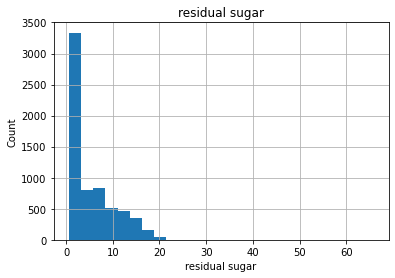

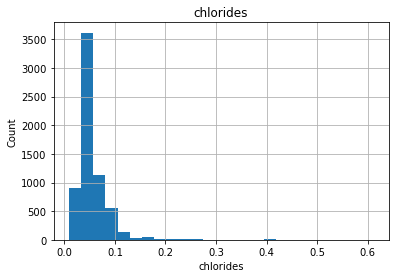

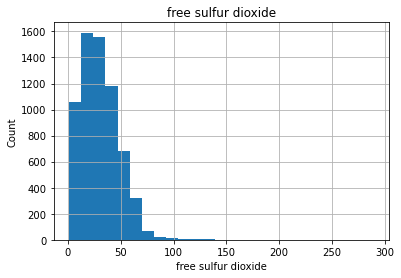

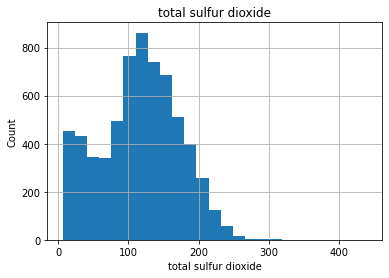

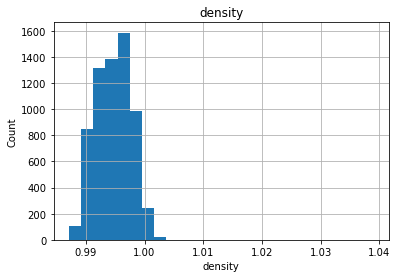

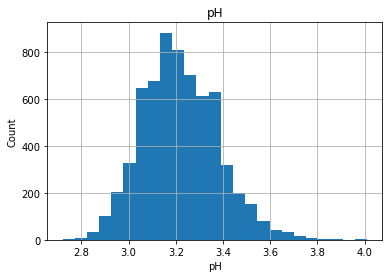

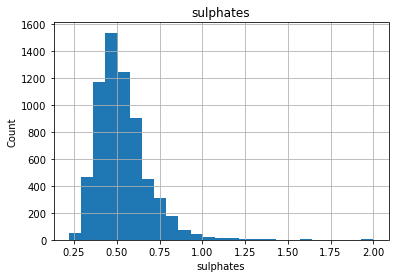

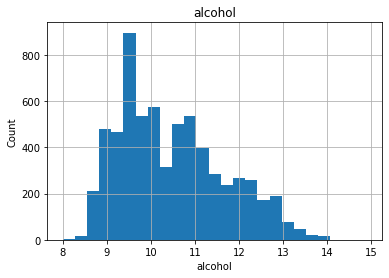

In [26]:
for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

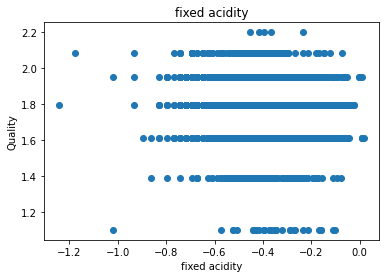

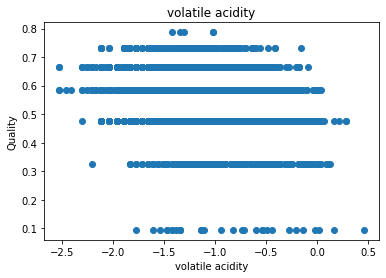

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


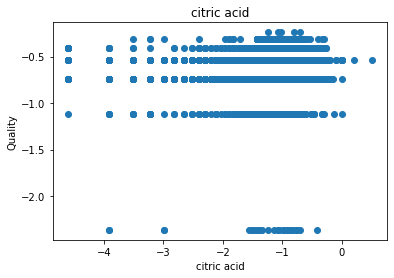

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


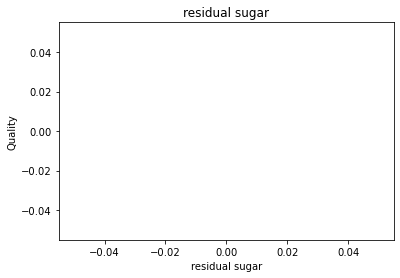

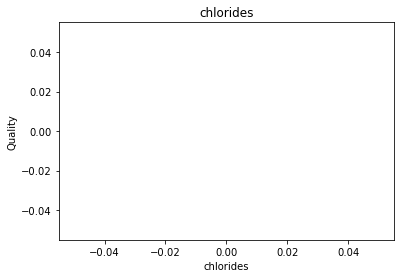

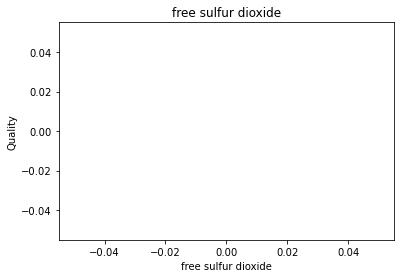

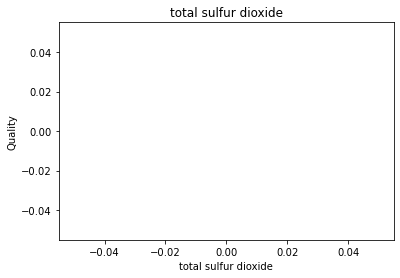

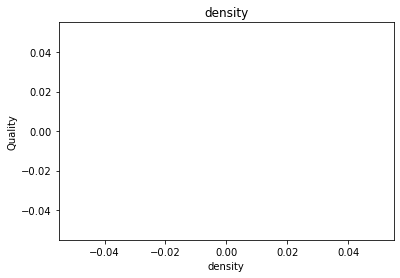

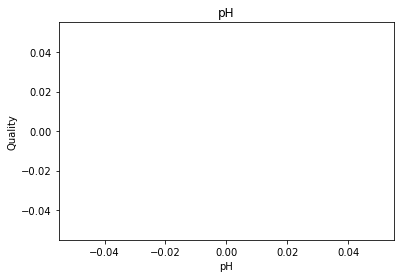

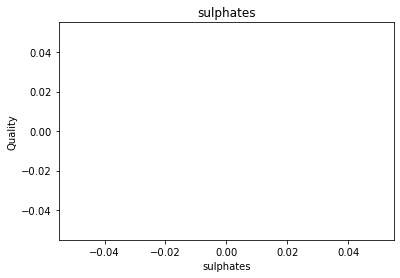

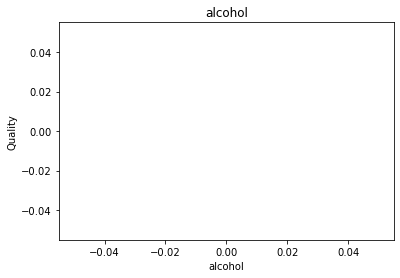

In [31]:
## Logarithmic Transformation
for feature in continuous_feature:
    
    df[feature]=np.log(df[feature])
    df['quality']=np.log(df['quality'])
    plt.scatter(df[feature],df['quality'])
    plt.xlabel(feature)
    plt.ylabel("Quality")
    plt.title(feature)
    plt.show()

In [32]:
pd.Categorical(df['alcohol'])

[2.174752, 2.251292, 2.312535, 2.292535, 2.292535, ..., 2.351375, 2.415914, 2.397895, 2.322388, 2.397895]
Length: 6497
Categories (111, float64): [2.079442, 2.128232, 2.140066, 2.151762, ..., 2.639057, 2.642622, 2.653242, 2.701361]

In [29]:
continuous_feature

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [30]:
df[continuous_feature].dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


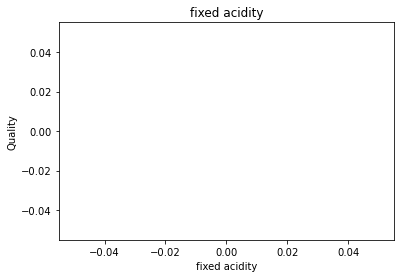

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


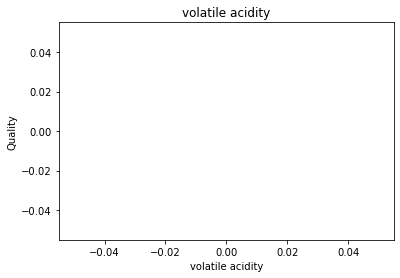

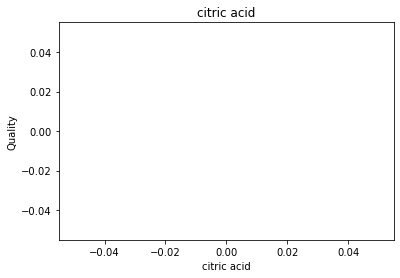

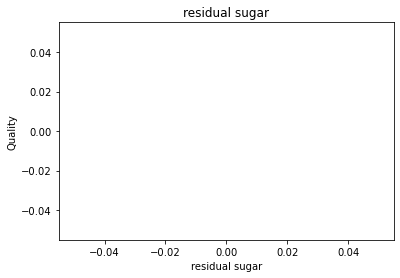

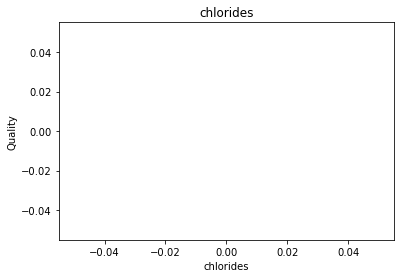

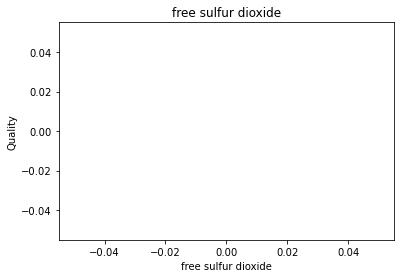

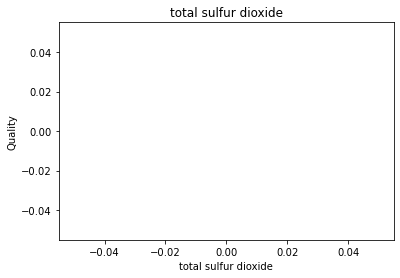

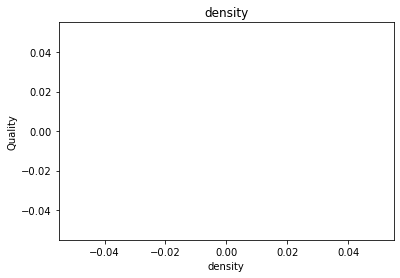

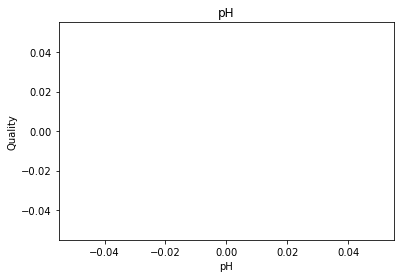

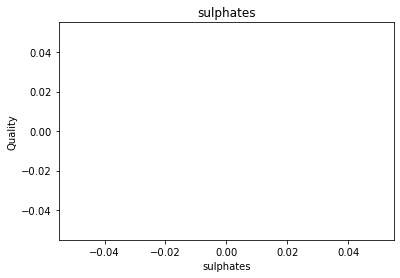

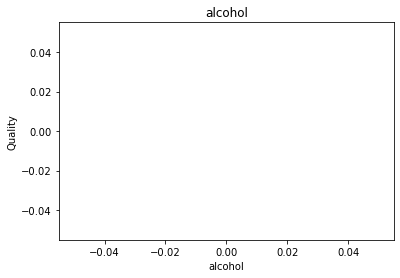

In [33]:
for feature in continuous_feature:
    
    df[feature]=np.log(df[feature])
    df['quality']=np.log(df['quality'])
    plt.scatter(df[feature],df['quality'])
    plt.xlabel(feature)
    plt.ylabel("Quality")
    plt.title(feature)
    plt.show()